<div class="alert alert-block alert-info">
    <h1>
    HR Dataset
    </h1>
    <h3>
        Pulled from Kaggle at:
        <a href="https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data"> Data Set</a>
    </h3>
</div>

<div class="alert alert-block alert-info">
    <h3>    
Let's setup consider the following scenario:
    </h3>
The HR team has collected the data to better understand the company’s landscape. They would like to answer the following questions:

1) We would like to know the breakdown of current employees. We've been given more resources for new hires and are looking to fill potential holes in the various teams. Can you make any suggestions as to which teams may require more assistance?

2) We need to update our new hire salary offers to better match our current employees. Could you provide us with offer suggestions based on department and position?   
</div>

<div class="alert alert-block alert-info">
    <h3>
        First let's get a look at the data to see what we are working with.
    </h3>
</div>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('hr_dashboard_data.csv')
df = df_raw.copy()

In [3]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [5]:
print('Total missing values in the data set: ', df.isnull().sum().sum())

Total missing values in the data set:  0


<div class="alert alert-block alert-warning">
    <h3>
    Looks like the dataset is clean. There are no missing values, and the data is properly typed outside of the 'Joining Date' feature. Let's set that to a datetime type.
    </h3>
</div>

In [6]:
df['Joining Date'].head()

0    Jan-20
1    Jan-99
2    Jan-17
3    Jan-22
4    Jan-05
Name: Joining Date, dtype: object

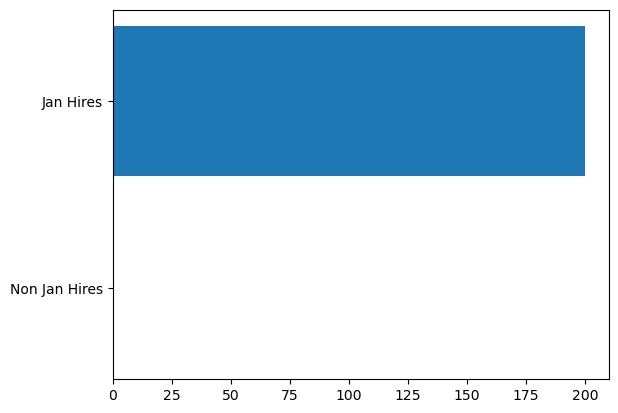

In [7]:
non_jan_cnt = (~df['Joining Date'].str.contains('Jan')).sum()
data = [non_jan_cnt, df.shape[0] - non_jan_cnt]
plt.barh(['Non Jan Hires', 'Jan Hires'], data)
plt.show()

In [8]:
df['Joining Date'] = pd.to_datetime(df['Joining Date'], format='%b-%y')
df['Joining Date'].head()

0   2020-01-01
1   1999-01-01
2   2017-01-01
3   2022-01-01
4   2005-01-01
Name: Joining Date, dtype: datetime64[ns]

<div class="alert alert-block alert-info">
    <h3> 
        1. Let's see if we can provide some insights on the current employee distribution. 
    </h3>
</div>

<div class="alert alert-block alert-success">
    <h3>
    Department and Position
    </h3>
</div>

<AxesSubplot:title={'center':'Employees By Position'}, xlabel='Position'>

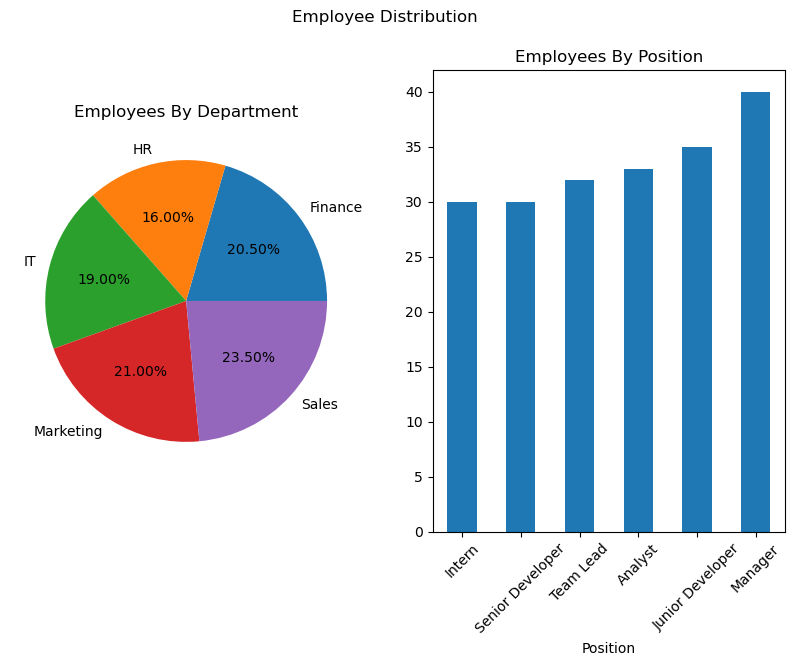

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Employee Distribution')
df.groupby('Department')['Name'].count().plot(kind='pie', autopct='%1.2f%%', ax=axes[0], ylabel='', title='Employees By Department')
df.groupby('Position')['Name'].count().sort_values().plot(kind='bar', ax=axes[1], title='Employees By Position', rot=45)

In [10]:
emp_dept_pos_piv = pd.pivot_table(
    data=df,
    values='Name',
    index='Position',
    columns='Department',
    aggfunc='count',
    margins=True
)
emp_dept_pos_piv

Department,Finance,HR,IT,Marketing,Sales,All
Position,,,,,,
Analyst,9,4,5,7,8,33
Intern,3,8,4,6,9,30
Junior Developer,8,3,7,9,8,35
Manager,11,5,9,7,8,40
Senior Developer,3,7,7,5,8,30
Team Lead,7,5,6,8,6,32
All,41,32,38,42,47,200


<div class="alert alert-block alert-success">
    <h3>
    Gender
    </h3>
</div>

In [11]:
gender_dept_piv = pd.pivot_table(
    data=df,
    index=['Department'],
    values='Name',
    columns='Gender',
    aggfunc='count'
)
gender_dept_piv

Gender,Female,Male
Department,,
Finance,17,24
HR,19,13
IT,16,22
Marketing,24,18
Sales,24,23


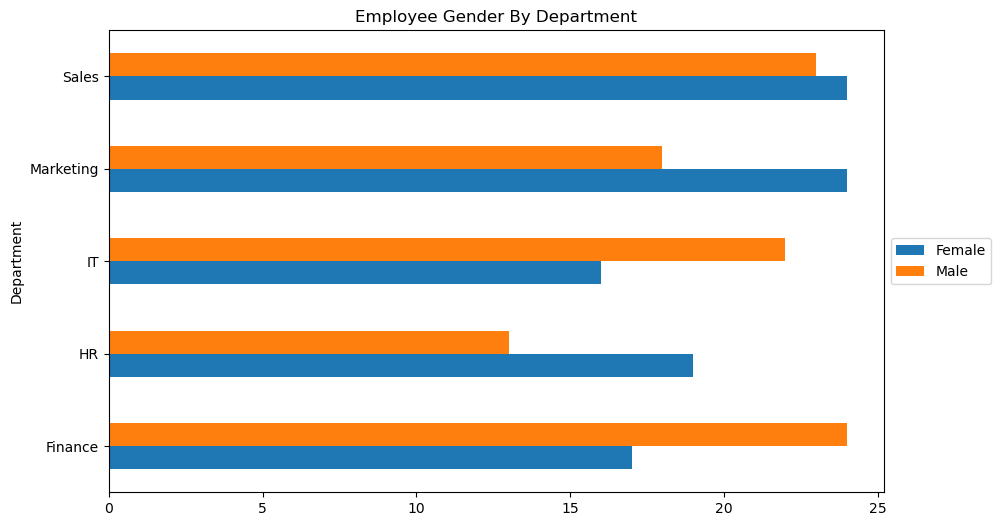

In [12]:
fig, ax = plt.subplots()
gender_dept_piv.plot(kind='barh', figsize=(10,6), title='Employee Gender By Department', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
gender_pos_piv = pd.pivot_table(
    data=df,
    index=['Position'],
    values='Name',
    columns='Gender',
    aggfunc='count'
)
gender_pos_piv

Gender,Female,Male
Position,,
Analyst,12,21
Intern,15,15
Junior Developer,19,16
Manager,22,18
Senior Developer,14,16
Team Lead,18,14


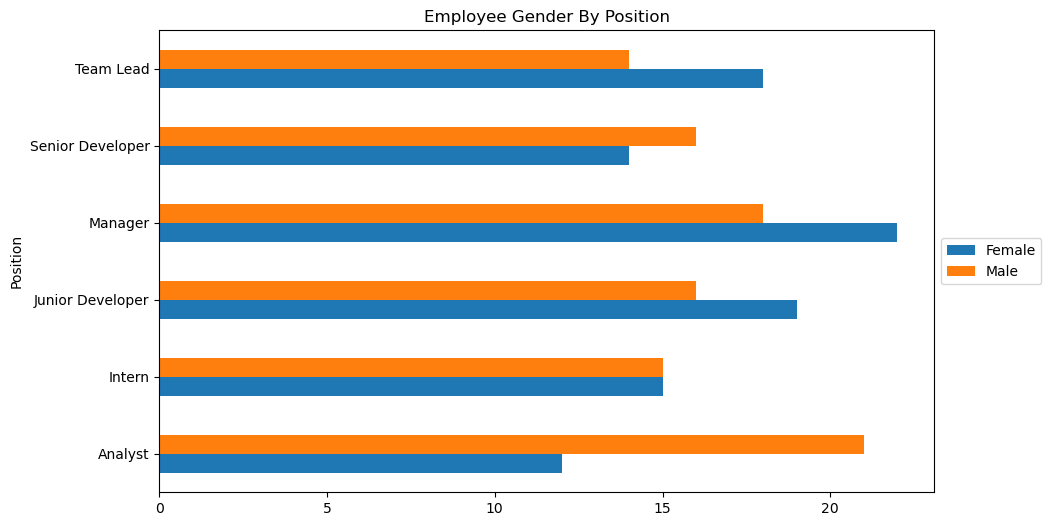

In [14]:
fig, ax = plt.subplots()
gender_pos_piv.plot(kind='barh', figsize=(10,6), title='Employee Gender By Position', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<div class="alert alert-block alert-success">
    <h3>
    Age
    </h3>
</div>

In [15]:
df['Age'].describe()

count    200.000000
mean      34.650000
std        9.797318
min       22.000000
25%       26.000000
50%       32.000000
75%       41.000000
max       60.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Employee Age Boxplot'}>

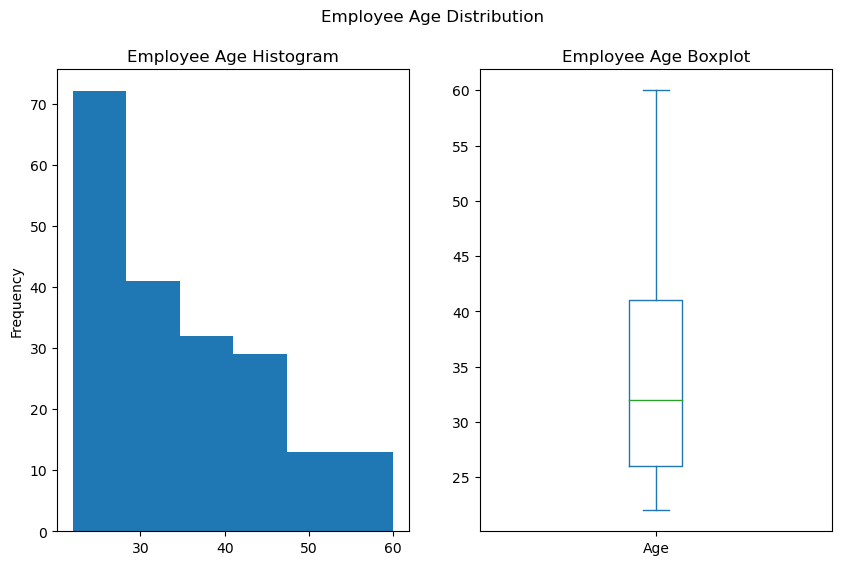

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('Employee Age Distribution')
df['Age'].plot(kind='hist', bins=6, xlabel='Age', ax=axes[0], title='Employee Age Histogram')
df['Age'].plot(kind='box', ax=axes[1], title='Employee Age Boxplot')

<AxesSubplot:title={'center':'Average Age By Position'}, xlabel='Position'>

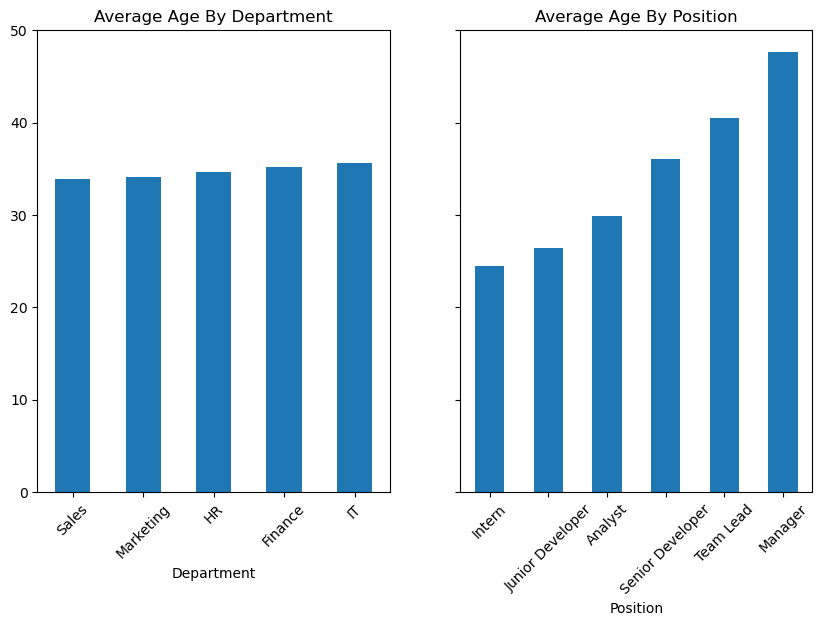

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
df.groupby('Department')['Age'].mean().sort_values().plot(kind='bar', ax=axes[0], title='Average Age By Department', rot=45)
df.groupby('Position')['Age'].mean().sort_values().plot(kind='bar', ax=axes[1], title='Average Age By Position', rot=45)

<div class="alert alert-block alert-success">
    <h3>
    Company Years
    </h3>
</div>

<AxesSubplot:title={'center':'Average Years With The Company By Position'}, xlabel='Position'>

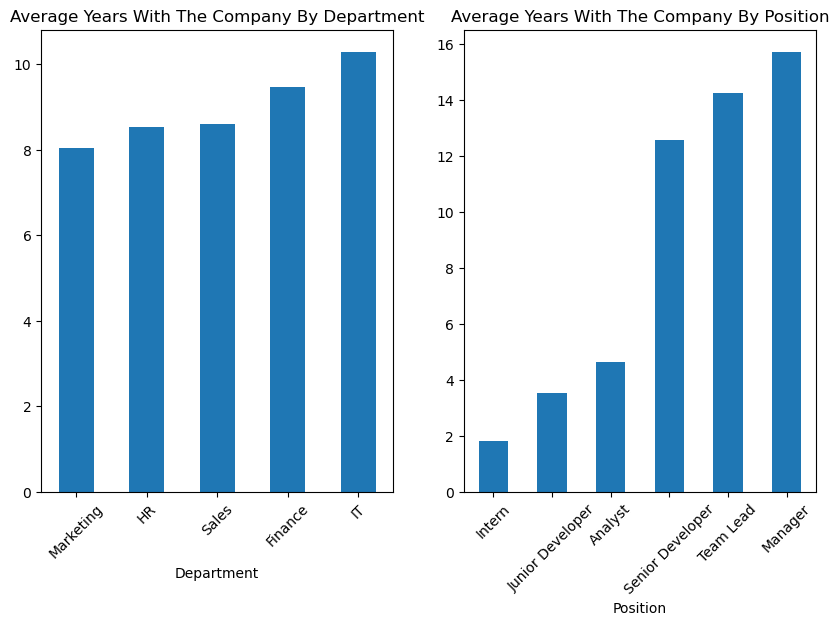

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
df['Company Years'] = pd.to_datetime('today').year - df['Joining Date'].dt.year
df.groupby('Department')['Company Years'].mean().sort_values().plot(kind='bar', ax=axes[0], title='Average Years With The Company By Department', rot=45)
df.groupby('Position')['Company Years'].mean().sort_values().plot(kind='bar', ax=axes[1], title='Average Years With The Company By Position', rot=45)

<div class="alert alert-block alert-warning">
    <h3>
    Ok seems we have a better understanding of the employee allocation. The Finance, Sales, and Marketing teams have the largest number of employees. While the more support orientated IT and HR teams have fewer employees. The company shows strong gender diversity across the department and position breakdowns. The employee age across the departments is uniform and increases as the positions move from junior to senior roles. The average Company Years across the departments is also uniform, but the average Company Years across position is interesting.
    </h3>
    <h3>
    If the Junior Developer role leads into the Senior Developer role, and similarly the Analyst role leads into the Team Lead role, we have a large gap in terms of average company years. The Developer and Analyst would on average spend roughly 10 years in these roles before moving upward. If this is by design, then feel free to disregard, but if not, this may be an area we could look at implementing programs/training to help facilitate career advancement. 
    </h3>
</div>

<div class="alert alert-block alert-success">
    <h3>
    More employees hold the manager position than any other in the company. Let’s dig a little deeper to see which teams have the most managers, maybe they would be able to take on more junior new hires.
    </h3>
</div>

<AxesSubplot:title={'center':'Managers To Team By Department'}, xlabel='Department'>

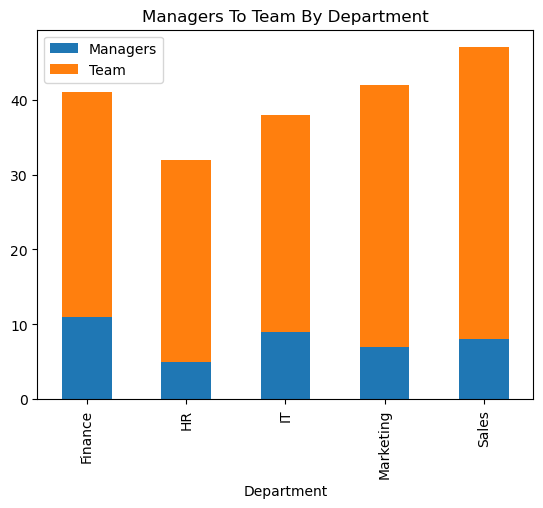

In [19]:
#Stacked bar chart, managers vs the rest of the department
stacked_df = pd.DataFrame(emp_dept_pos_piv.columns)
stacked_df.drop(stacked_df.loc[stacked_df['Department'] == 'All'].index, inplace=True)
depts = stacked_df['Department'].values
for dept in depts:
   stacked_df.loc[stacked_df['Department'] == dept, 'Managers'] = emp_dept_pos_piv[dept]['Manager']
   stacked_df.loc[stacked_df['Department'] == dept, 'Team'] = emp_dept_pos_piv[dept]['All'] - emp_dept_pos_piv[dept]['Manager']
    
stacked_df = stacked_df.astype({'Managers':'int64', 'Team':'int64'})
stacked_df.plot(kind='bar', stacked=True, x='Department', title='Managers To Team By Department')

<AxesSubplot:title={'center':'Team Member per Manager'}, ylabel='Department'>

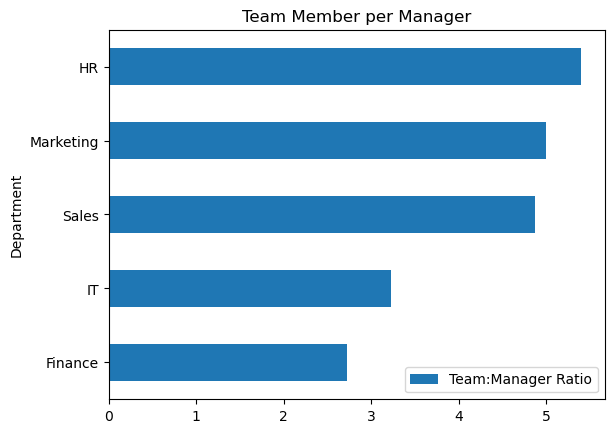

In [20]:
stacked_df['Team:Manager Ratio'] = stacked_df['Team'] / stacked_df['Managers']
stacked_df.sort_values(by='Team:Manager Ratio').plot(kind='barh', x='Department', y='Team:Manager Ratio', title='Team Member per Manager')

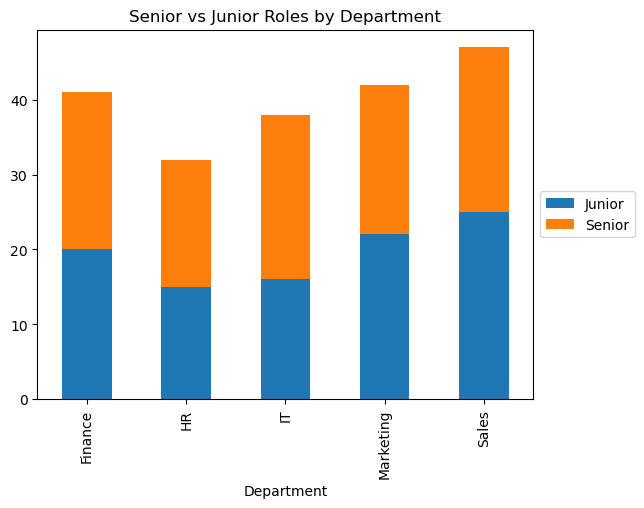

In [21]:
sr_pos = ['Manager', 'Senior Developer', 'Team Lead']
df['Position Level'] = np.where(df['Position'].isin(sr_pos), 'Senior', 'Junior')
fig, axes = plt.subplots()
df.groupby('Department')['Position Level'].value_counts().unstack().plot(kind='bar', stacked=True, title='Senior vs Junior Roles by Department', ax=axes)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<div class="alert alert-block alert-success">
    <h3>
    Let's also try to gauge the workload of each department.
    </h3>
</div>

<AxesSubplot:xlabel='Department'>

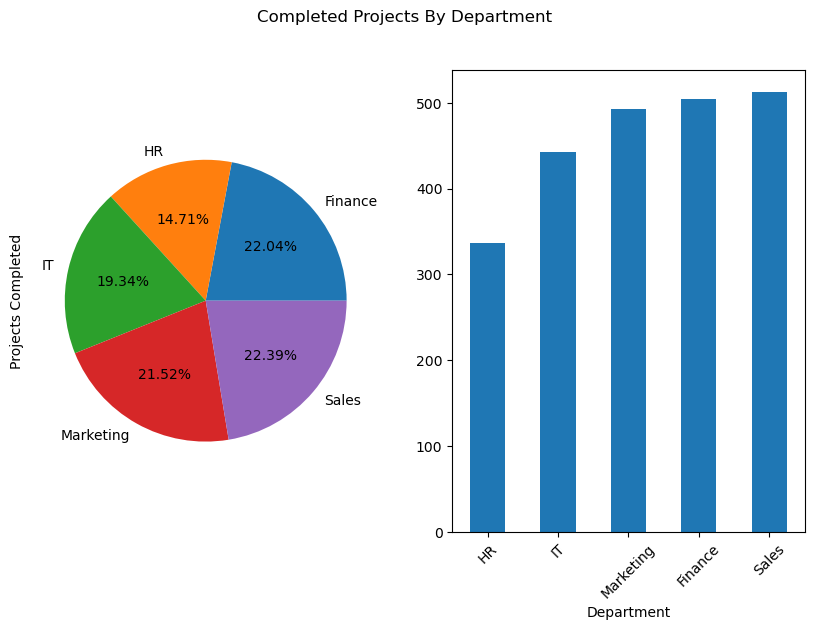

In [22]:
plt, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle('Completed Projects By Department')
df.groupby('Department')['Projects Completed'].sum().plot(kind='pie', autopct='%1.2f%%', ax=axes[0])
df.groupby('Department')['Projects Completed'].sum().sort_values().plot(kind='bar', ax=axes[1], rot=45)

<AxesSubplot:title={'center':'Productivity % Avg By Department'}, ylabel='Department'>

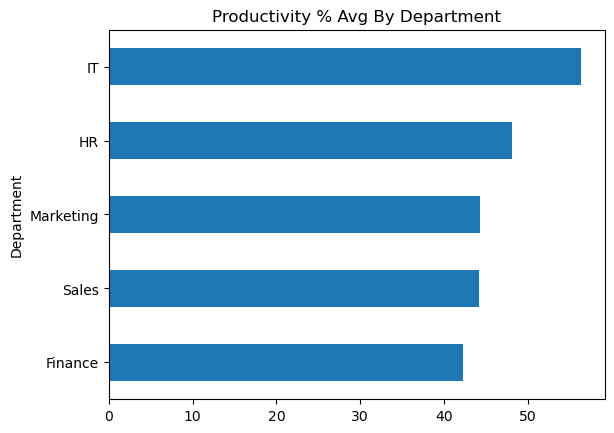

In [23]:
df.groupby('Department')['Productivity (%)'].mean().sort_values().plot(kind='barh', title='Productivity % Avg By Department')

<div class="alert alert-block alert-warning">
    <h3>
The manager position is the highest filled role in the company. With the Finance and IT departments having around 3 team members per manager. If the HR team is looking to fill out more junior roles in the company, these two teams are attractive because they have the best team member to manager ratio. The Finance department also has the 2nd highest number of completed projects and the lowest average productivity percentage. The IT department has roughly 50 less projects completed but does boast the strongest average productivity percentage. I would suggest adding junior new hires to the Finance department. 
    </h3>
    <h3>
If the HR team is looking to hire more leadership positions i would suggest adding Managers to the Sales and Marketing departments. These departments lead the company in number of completed projects, have an average productivity percentage, and have a 5 to 1 team to manager ratio. Decreasing this ratio may lead to an increase in productivity and completed projects. You could also consider adding a Senior Developer to the Finance department, it is the 3rd largest department in the company but only has 10% of the Senior Developers. 
    </h3>
    <h3>
Note we did not suggest the HR department even though they have the highest Team to Manager ratio and the lowest project completion rate because they have the 2nd highest productivity rate in the company. This suggests that the companies support oriented departments may have fewer projects in total, but those projects tend to be larger in scope than the projects of the forward-facing departments.
    </h3>
</div>

<div class="alert alert-block alert-info">
    <h3>
2. We need to update our new hire salary offers to better match our current employees. Could you provide us with offer suggestions based on department and position?
    </h3>
</div>

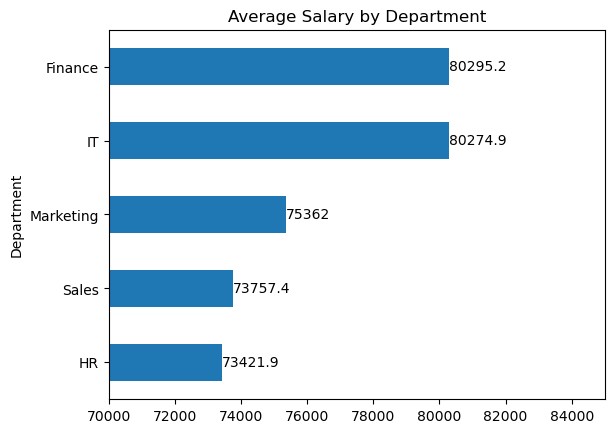

In [24]:
sal_fig = df.groupby('Department')['Salary'].mean().sort_values().plot(kind='barh', xlim=(70_000, 85_000), title='Average Salary by Department')
for container in sal_fig.containers:
    sal_fig.bar_label(container)

In [25]:
#Split the position's into two categories, Junior Roles and Senior Roles based on a Salary Threshold
avg_sal_pos_df = df.groupby('Position')['Salary'].mean().sort_values()
salary_thresh = 70_000
jr_pos = avg_sal_pos_df.loc[avg_sal_pos_df < salary_thresh].index
sr_pos = avg_sal_pos_df.loc[avg_sal_pos_df >= salary_thresh].index


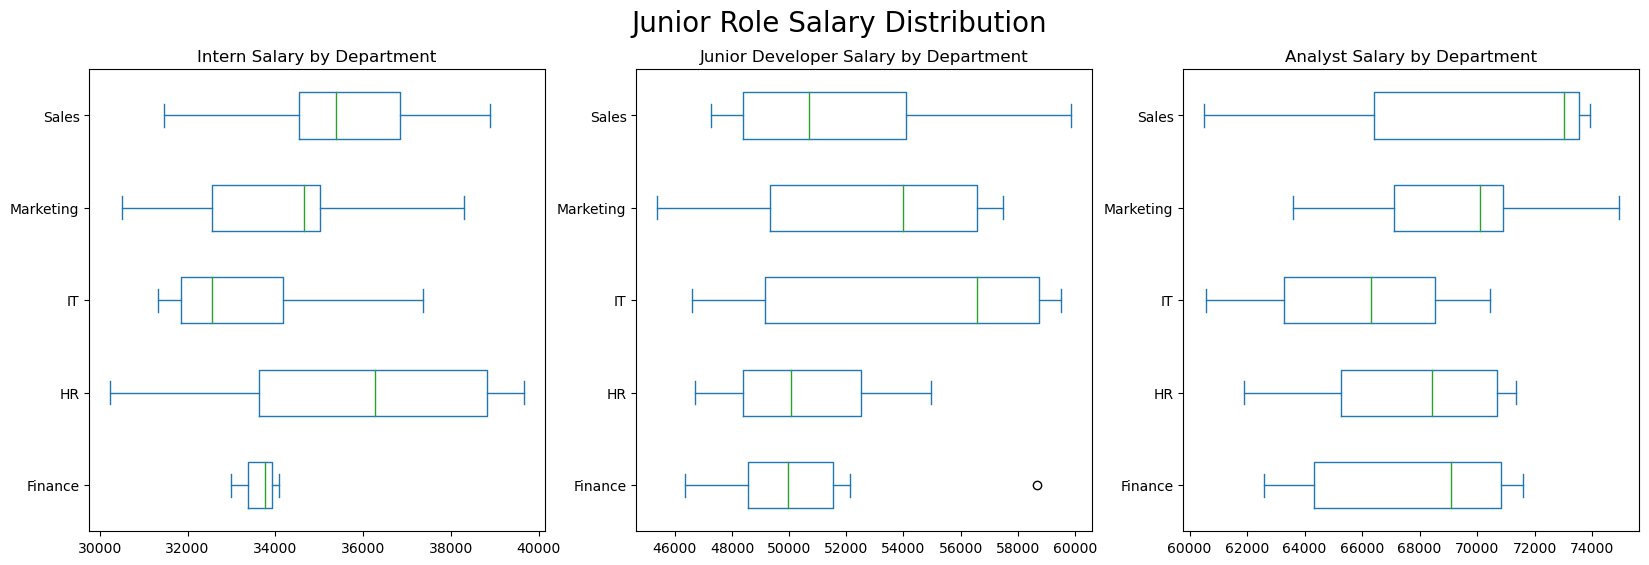

In [29]:
fig, axes = plt.subplots(1, len(jr_pos), figsize=(20,6))
fig.suptitle('Junior Role Salary Distribution', fontsize=20)
plt_num = 0
dept_pos_sal_figs = {}
for pos in jr_pos:
    data = {}
    for dept in depts:
        data[dept] = df.loc[(df['Department'] == dept) & (df['Position'] == pos), 'Salary']
    data = pd.DataFrame(data)
    data.plot(kind='box', vert=False, title=f'{pos} Salary by Department', ax=axes[plt_num])
    plt_num += 1

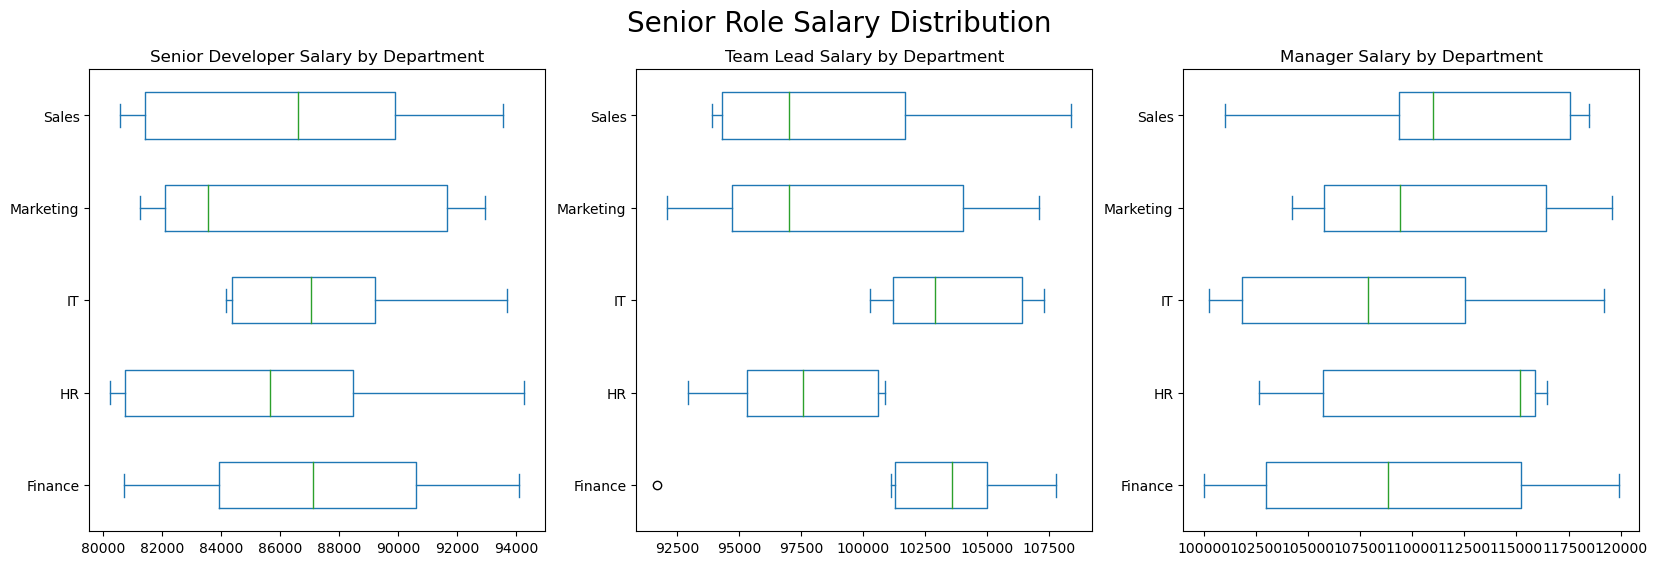

In [30]:
fig, axes = plt.subplots(1, len(sr_pos), figsize=(20,6))
fig.suptitle('Senior Role Salary Distribution', fontsize=20)
plt_num = 0
dept_pos_sal_figs = {}
for pos in sr_pos:
    data = {}
    for dept in depts:
        data[dept] = df.loc[(df['Department'] == dept) & (df['Position'] == pos), 'Salary']
    data = pd.DataFrame(data)
    data.plot(kind='box', vert=False, title=f'{pos} Salary by Department', ax=axes[plt_num])
    plt_num += 1

In [31]:
#get the two outliers: Finance Team lead and Finance Junior Developer
print(df.loc[(df['Department'] == 'Finance') & 
       (df['Position'] == 'Team Lead'), 
       ['Name','Department', 'Position', 'Salary']
      ].sort_values(by='Salary').head(1))

print(df.loc[(df['Department'] == 'Finance') & 
       (df['Position'] == 'Junior Developer'), 
       ['Name','Department', 'Position', 'Salary']
      ].sort_values(by='Salary', ascending=False).head(1))

              Name Department   Position  Salary
186  Brian Delgado    Finance  Team Lead   91680
             Name Department          Position  Salary
149  Brett Butler    Finance  Junior Developer   58688


<AxesSubplot:>

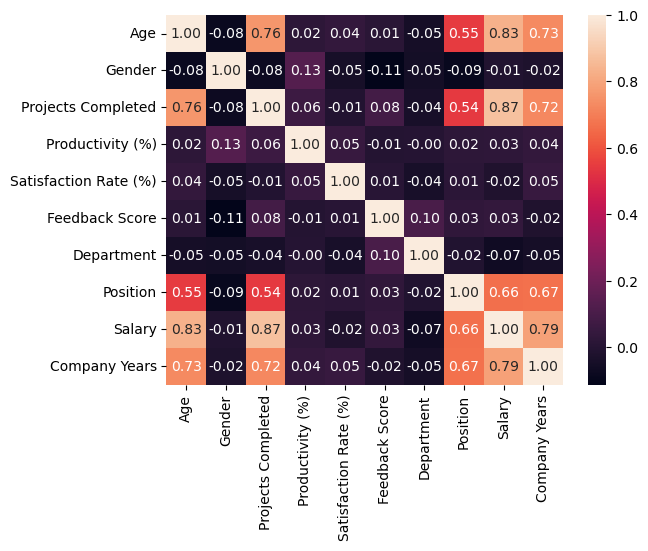

In [32]:
df_heat = df.drop(columns=['Name', 'Joining Date'])

df_heat['Gender'] = df_heat['Gender'].astype('category')
df_heat['Department'] = df_heat['Department'].astype('category')
df_heat['Position'] = df_heat['Position'].astype('category')

df_heat['Gender'] = df_heat['Gender'].cat.codes
df_heat['Department'] = df_heat['Department'].cat.codes
df_heat['Position'] = df_heat['Position'].cat.codes

#df_heat.head()
sns.heatmap(df_heat.corr(), annot=True, fmt='.2f')

<div class="alert alert-block alert-success">
    <h3>
    Salary has a strong positive Pearson correlation coefficient with Age, Projects Completed, and Company Years. Let's take a look at the scatter plots and fit a regression line by position. We will discard the Age feature here because it is implied in potential new hires experience.    
    </h3>
</div>

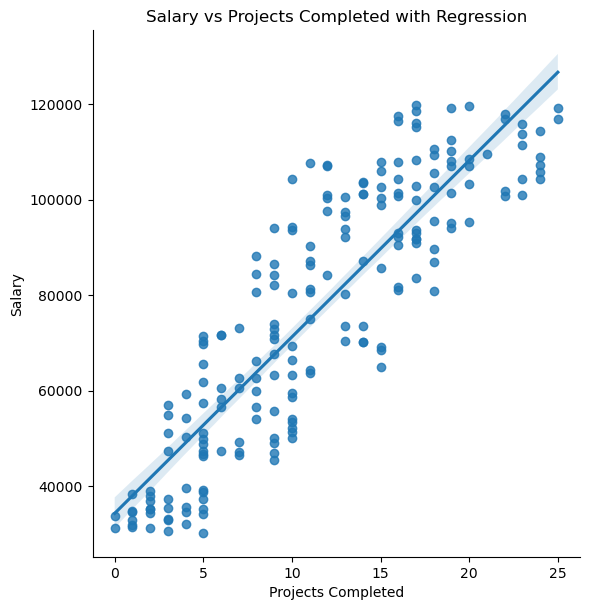

In [33]:
sns.lmplot(data=df, x='Projects Completed', y='Salary',  height=6).set(title='Salary vs Projects Completed with Regression')

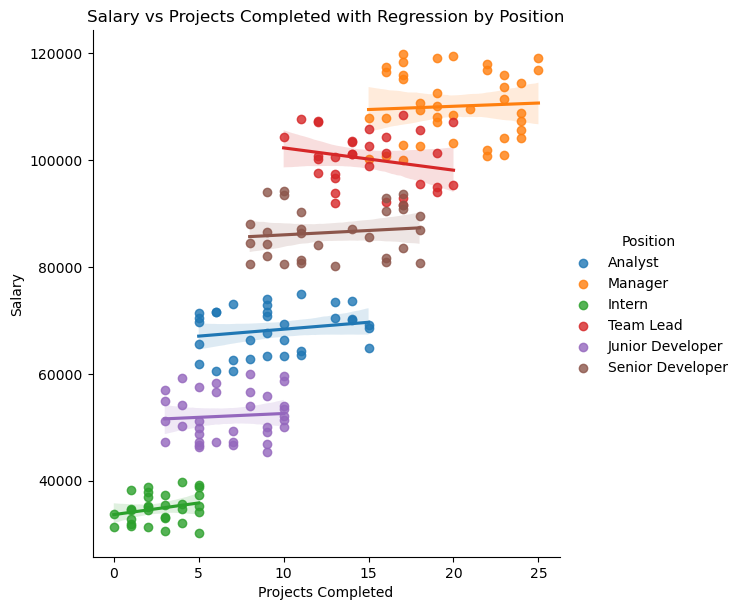

In [34]:
sns.lmplot(data=df, x='Projects Completed', y='Salary', hue='Position', height=6).set(title='Salary vs Projects Completed with Regression by Position')

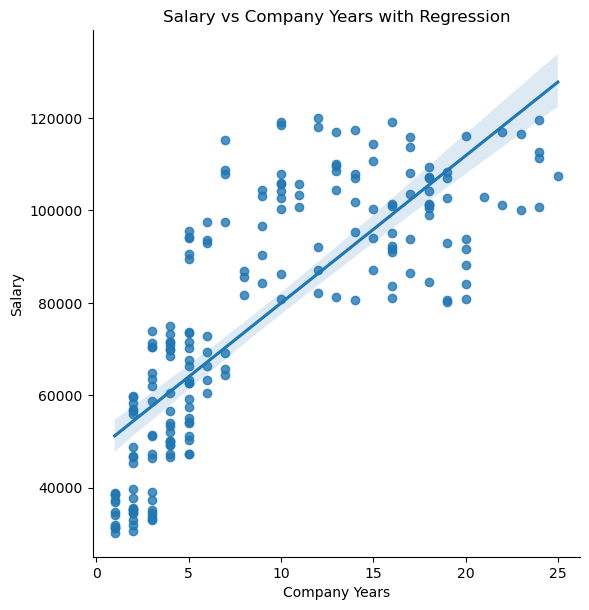

In [35]:
sns.lmplot(data=df, x='Company Years', y='Salary',  height=6).set(title='Salary vs Company Years with Regression')

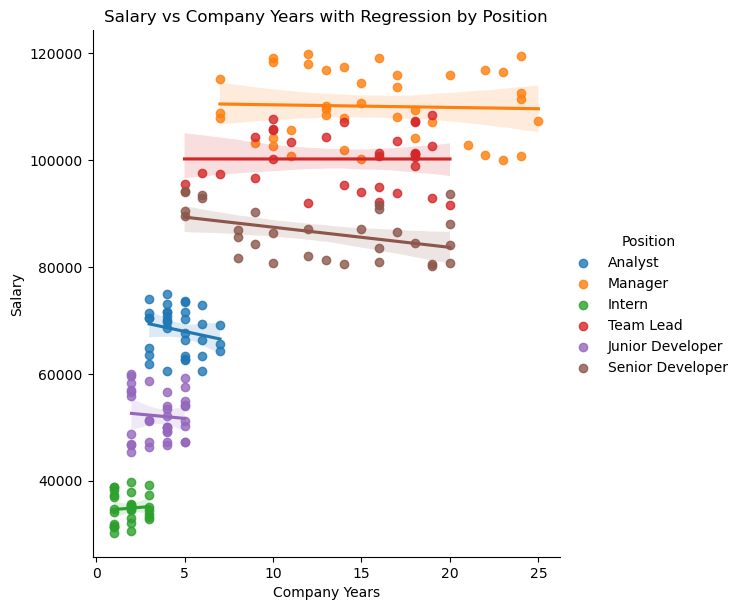

In [36]:
sns.lmplot(data=df, x='Company Years', y='Salary', hue='Position', height=6).set(title='Salary vs Company Years with Regression by Position')

<div class="alert alert-block alert-success">
    <h3>
    We can see the positive relationship in the two graphs with a single regression line, but when we draw the regression lines by position, we see a very different story. Many of the Position regression lines have a much smaller slope than the overall regression line for each plot, and some are even negative. This suggests that an employee’s salary is set when they are hired into a position and doesn’t change much throughout the employee’s tenure. 
    </h3>
</div>

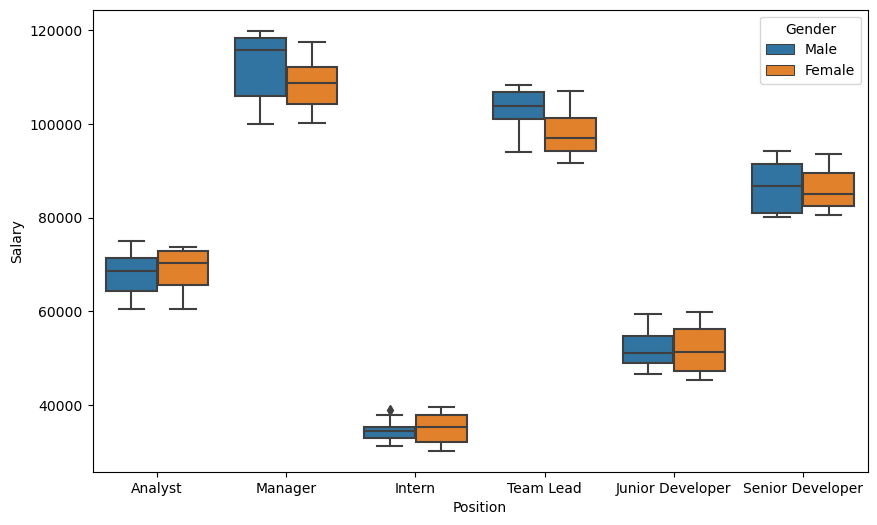

In [37]:
fig, axes = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, x='Position', y='Salary', hue='Gender', ax=axes)
plt.show()

<div class="alert alert-block alert-warning">
    <h3>
First, we looked at the average salary across the various departments. There is roughly a $7,000 average salary difference between the highest paid departments, Finance and IT, and the HR department which is currently the lowest. This is partially explained by the team member to manager ratio. The highest paid position across all departments is the Manager role. The Finance and IT departments have the lowest ratio's at around 3:1, while the HR department has the highest ratio at around 5:1. The more senior roles a department has, the higher the departments average salary.
    </h3>
    <h3>
Next, we looked at the salaries of all positions across the companies’ departments. The variation in employee salaries by position seems reasonable with all salaries within 15,000 of each other. We did manage to identify 2 salary outliers both in the Finance department, they are listed below: 
    </h3>
        <ul>
            <li>Brian Delgado Finance  Team Lead          91680</li>
            <li>Brett Butler  Finance  Junior Developer   58688</li>
        </ul>
    <h3>
    Finally, we created a heatmap using the Pearson correlation coefficient to look at what features may help us offer salary suggestions. Three features share a strong positive correlation with salary: Age, Projects Completed, and Company Years. We discarded the Age feature because it probably won't impact on our salary offer and is somewhat implied by the other two features. Each feature has two plots, the first shows the overall regression line for the overall plot, and the second shows the regression line for each position. What is interesting is that the overall regression lines have a strong positive slope, while the regression lines of the positions within the same graph are much smaller and sometimes negative. This suggests that the salary of an employee might be set when starting a new position and does not increase over time. 
    </h3>
    <h3>
    Salary Offer Suggestion: Since we don't have a great way to gauge a potential new hire's Completed Projects, we will use their experience as the independent variable in the linear regression from the Company Years vs Salary plot. We will then threshold the estimation with the Minimum or Maximum for the current employees in the same department's position. Example below:
    </h3>
</div>

In [38]:
slope, intercept = np.polyfit(df['Company Years'], df['Salary'], 1)
print(f'Regression line: y = {slope:.2f}x + {intercept: .2f}')

Regression line: y = 3189.09x +  48013.07


In [39]:
nh_pos = 'Team Lead'
nh_dept = 'HR'
nh_experience = 15
nh_sal_offer = nh_experience * slope + intercept
min_cur_emp_sal, max_cur_emp_sal = df.loc[(df['Department'] == nh_dept) &
                 (df['Position'] == nh_pos),
                'Salary'
                ].sort_values().values[[1, -1]]
nh_sal_offer = max(min_cur_emp_sal, min(nh_sal_offer, max_cur_emp_sal))
print(f'New hire salary offer: {nh_sal_offer:.2f}')

New hire salary offer: 95849.48
